In [1]:
from IPython.display import Image

- MP -> MDP
    - MP: markov process
        - 即系统的当前状态只与前一个状态有关，与更早之前的历史状态无关。换句话说，系统的未来发展只依赖于当前状态，而与过去的状态没有直接关系。
        $$
        p(s'|s,a)=p(s_{t+1}|s_t,a_t)
        $$
        - 下一时刻的状态转移（转移到什么状态 $s_{t+1}$，只跟当前时间的状态 $s_t$ 以及当前时刻采取的动作 $a_t$ 有关，而与更早之前的状态无关；
        - 马尔可夫性是对环境而不是agent的约束；
    - MDP：markov decision process
        - https://en.wikipedia.org/wiki/Markov_decision_process
        - 找到最优策略（optimal policy），使收益最大化的策略；
        - 马尔可夫决策过程是在马尔可夫过程的基础上增加了**决策**的元素。除了状态转移外，还考虑了**行动Action**的选择和**奖励Reward**的反馈。
        - MDP有几个主要组成部分：
            - 状态（State, S）：描述系统的某一特定情况。
            - 动作（Action, A）：在某一状态下可以选择的行动。
            - 转移概率（Transition Probability, P）：在某个状态下采取某个动作后转移到另一个状态的概率。
            - 奖励（Reward, R）：每次从一个状态到另一个状态的转移后获得的奖励。
            - 折扣因子（Discount Factor, γ）：用于衡量未来奖励的价值，通常是一个小于1的值，表示未来的奖励比当前的奖励值要低。

### agent 与 env 的互动

In [3]:
Image(url='http://incompleteideas.net/book/first/ebook/figtmp7.png', width=300)

- 智能体与环境之间的互动
    - 智能体执行行动时，状态会发生转移：$p(s'|s,a)$
    - 时刻 $t$ 的状态是 $S_t$，在这个状态智能体执行行动 $A_t$，获得奖励 $R_t$，并移动到 $S_{t+1}$
    - $(S_0,A_0,R_0),(S_{1},A_1,R_1),(S_2,A_2,R_2),\cdots,(S_t,A_t,R_t), (S_{t+1},\cdots$
- 奖励时机的两种记号约定
    - 在状态 $S_t$ 中执行动作 $A_t$，获得奖励 $R_t$ 并移动到下一个状态 $S_{t+1}$
    - 在状态 $S_t$ 中执行动作 $A_t$，获得奖励 $R_{t+1}$ 并移动到下一个状态 $S_{t+1}$

### MDP 的数学表示

- agent、env 及二者的互动，三要素
    - 状态转移：环境状态如何转移
        - 确定性（deterministic）：$s'=f(s,a)$，下一个状态 $s'$ 由当前状态 $s$ 和行动唯一确定；
            - $f(s,a)$: 称为状态转移函数（state transition function）
        - 随机性（stochastic）：$p(s'|s,a)$，概率形式描述（state transition probability）
            - 如智能体选择了向左移动的行动，那么它将以 0.9 的概率向左移动，以 0.1 的概率留在原地；
                - 地板打滑，或者智能代理的内部机制（电机）不能正常工作导致的；
    - 奖励（reward）：环境如何给予奖励
        - 奖励函数（$r(s,a,s')$）
        - 如果奖励只跟到达的状态有关，则奖励函数简化为 $r(s')$
        - 奖励也可以是 stochastic 的，
            - 如，当 agent 去某个地方时，有 0.8 的概率会被敌人攻击，得到的奖励是 -10，也就是会有 0.2 的概率不会被攻击；
            - 此时，要计算的 $r(s,a,s')$ 期望；
    - 策略：智能代理如何决定行动
        - $p(s'|s,a)$ 环境的状态转移只以当前状态 $s$ 和行动 $a$ 为条件来决定下一个状态 $s'$，而不需要先前的信息；
        - $r(s,a,s')$ 奖励也是基于当前状态 $s$，行动 $a$ 和转移后的状态 $s'$ 来决定，
        - 意味着关于环境的所有必要信息都在当前状态中（在当前状态下有足够的信息来做出最佳选择），agent 只需基于当前状态即可决定行动；
        - 可以是确定性的 $a=\mu(s)$，也可以是随机性的（$\pi(a|s)$，概率描述）；

### objective of MDP

- MDP 的 objective：找到最优策略（optimal policy），使**收益最大化**的策略；
- 收益（return），注意跟奖励（reward）含义不同，
    - 考虑这样一个场景，时刻 $t$（任意值），状态为 $S_t$，智能体根据策略 $\pi(a|s)$ 选择和执行动作 $A_t$，转移到 $S_{t+1}$ 得到奖励 $R_t$，，这个过程不断重复进行（生成 trajectory）
        - $(S_t,A_t,R_t),S_{t+1}, ...$
    $$
    G_t=\gamma^0R_t+\gamma R_{t+1}+\gamma^2R_{t+2} + \cdots + \gamma^kR_{t+k}+\cdots
    $$
    - 收益（return）被表示为 agent 获得的奖励之和，随着时间的推移，奖励会被 $\gamma$ 指数级削弱（未来的价值折现 discount），$\gamma$ 称为 discount rate（折现率）
    - 引入折现率是为了防止连续型任务的收益变得无限大，防止 return 的发散。此外折现率的存在也会使得近期的奖励更为重要；
- state value function
    - $p(s'|s,a),\pi(a|s)$ 都可能是随机的，收益也将是随机的；
        - 即从相同的状态开始，采样同样的策略，不同回合最终得到的收益很可能是不同的；
    - $v_\pi(s)=\mathbb E[G_t|S_t=s,\pi]$：通过引入期望消除随机性；
        - $v_\pi(s)$ 来表示收益的期望值，称为 state-value function
        - $v_\pi(s)=\mathbb E_\pi[G_t|S_t=s]$，condition on $\pi$；
            - 即 $\pi$ 发生变化，收益也会发生变化；

### 最优策略与最优价值函数

- 考虑两种策略，及对应的状态价值，$v_\pi(s)$ vs. $v_{\pi'}(s)$
- 所有的状态下 $v_{\pi’}(s)\geq v_\pi(s)$ 都成立，才可以说，策略 $\pi'$ 要比策略 $\pi$ 更好；
- 进一步，当所有状态下的某个策略的状态价值函数都大于其他任何策略时，这个策略就是最优策略。
- MDP中，至少存在一个最优策略；且该最优策略时确定性策略；（数学推导可以看相关的教材）
    - 最优策略对应的状态价值函数称为最优状态价值函数（optimal state-value function）
    - $v^{*}_\pi$

### 一个例子

In [4]:
Image(url='./figs/mdp-2states.png', width=300)

两个方格，左右两边都有墙。这个问题的设定如下：
- 智能代理可以向右或向左移动。（left/right，没有待在原地这个选项）
- 状态迁移是确定性的（如果 agent 采取向右移动的行动，那么它的下一个状态将总是向右移动）。
- 当智能代理从 L1 移动到 L2 时，它将获得一个苹果，奖励为 +1。
- 当智能代理从 L2 移动到 L1 时，苹果会重新出现。
- 如果智能代理撞到了墙，那么它会获得 -1 的奖励（惩罚）；如果智能代理在 L2 并向右移动，那么它同样会获得 -1 的奖励（此时苹果不会出现）。
这次迭代问题被设定为没有“结束”的连续性任务。


|| $s = L1$  | $s = L2$   |
|------------|--------------|--------------|
| $\pi_1(a|s)=\mu_1(s)$ | Right        | Right        |
| $\pi_2(a|s)=\mu_2(s)$ | Right        | Left         |
| $\pi_3(a|s)=\mu_3(s)$ | Left         | Right        |
| $\pi_4(a|s)=\mu_4(s)$ | Left         | Left         |


- $v_{\pi_1}(s=L1)=1+0.9\cdot (-1)+0.9^2\cdot (-1)+\cdots$
    - $1-0.9(1+0.9+0.9^2+\cdots)=1-0.9\frac{1}{1-0.9}=-8$
- $v_{\pi_1}(s=L2)=-1+0.9\cdot(-1)+0.9^2\cdot (-1)+\cdots$
    - $-1-0.9(1+0.9+0.9^2+\cdots)=-1-0.9\frac{1}{1-0.9}=-10$
- $v_{\pi_2}(s=L1)=1+0.9\cdot 0+0.9^2\cdot 1+0.9^3\cdot 0+$
    - $1+0.9^2+0.9^4+\cdots=1+0.9^2(1+0.9^2+\cdots)$
    - $1+0.9^2\frac{1}{1-0.81}$ = 5.26
- $v_{\pi_2}(s=L2)=0+0.9\cdot 1+0.9^2\cdot 0+0.9^3\cdot 1+\cdots$
    - $0.9(1+0.9^2+\cdots)=0.9\frac{1}{1-0.81}$=4.73
- $v_{\pi_3}(s=L1)=-1+0.9\cdot (-1)+0.9^2\cdot (-1)+0.9^3\cdot (-1)+\cdots$
    - $-1\frac{1}{1-0.9}=-10$
- $v_{\pi_3}(s=L2)=-1+0.9\cdot (-1)+0.9^2\cdot (-1)+0.9^3\cdot (-1)+\cdots$
    - $-1\frac1{1-0.9}=-10$
- $v_{\pi_4}(s=L1)=-1+0.9\cdot (-1)+0.9^2\cdot (-1)+0.9^3\cdot (-1)+\cdots$
    - $-1\frac1{1-0.9}=-10$
- $v_{\pi_4}(s=L2)=0+0.9\cdot (-1)+0.9^2\cdot (-1)+0.9^3\cdot (-1)+\cdots$
    - $-0.9\frac1{1-0.9}=-9$

In [8]:
import matplotlib.pyplot as plt

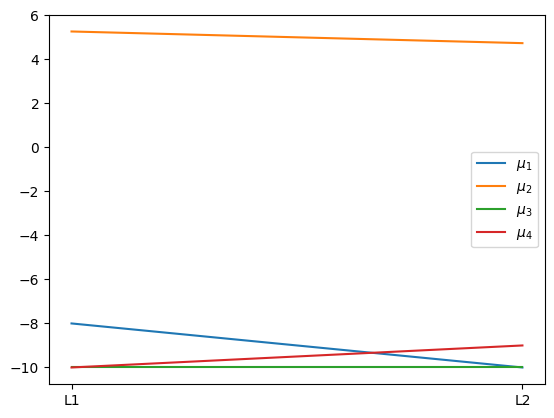

In [14]:
plt.plot([-8, -10], label='$\mu_1$')
plt.plot([5.26, 4.73], label='$\mu_2$')
plt.plot([-10, -10], label='$\mu_3$')
plt.plot([-10, -9], label='$\mu_4$')
plt.xticks(ticks=[0, 1], labels=['L1', 'L2'])
plt.legend()